In [39]:
import advent
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import asyncio
from advent.intcode import run_io, compute


async def __main__() -> None:
    with open("input/10.txt") as file_input:
        symbols = file_input.read().strip("\n").split(",")
        code = [int(symbol) for symbol in symbols]

        iq = asyncio.Queue()
        oq = asyncio.Queue()
        task = asyncio.create_task(compute(code, iq, oq))

        colors = {}
        pos = (0, 0)
        rot = 'up'
        colors[pos] = 1

        while not task.done():
            await iq.put(colors.get(pos, 0))
            color = await oq.get()
            turn = await oq.get()

            colors[pos] = color
           # print(turn)

            if rot == 'up':
                if turn == 0:
                    rot = 'left'
                    pos = (pos[0] - 1, pos[1])
                else:
                    rot = 'right'
                    pos = (pos[0] + 1, pos[1])
            elif rot == 'left':
                if turn == 0:
                    rot = 'down'
                    pos = (pos[0], pos[1] - 1)
                else:
                    rot = 'up'
                    pos = (pos[0], pos[1] + 1)
            elif rot == 'down':
                if turn == 0:
                    rot = 'right'
                    pos = (pos[0] + 1, pos[1])
                else:
                    rot = 'left'
                    pos = (pos[0] - 1, pos[1])
            elif rot == 'right':
                if turn == 0:
                    rot = 'up'
                    pos = (pos[0], pos[1] + 1)
                else:
                    rot = 'down'
                    pos = (pos[0], pos[1] - 1)
 


        return colors

In [42]:
task = asyncio.create_task(__main__())
colors = await task

In [50]:
white = [c[0] for c in colors.items() if c[1] == 1]

In [52]:
x,y = zip(*white)

(-20, 20)

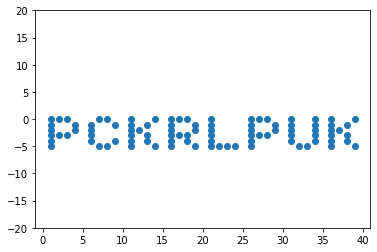

In [56]:
plt.scatter(x,y)
plt.ylim(-20,20)